### Cat Vs Dog Prediction Using Transfer Learning (Mobilenet)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub # can pip install

In [2]:
#data sugmentation
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
training_set = train_datagen.flow_from_directory('image_data/training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 198 images belonging to 2 classes.


In [3]:
training_set.class_indices

{'Cat': 0, 'Dog': 1}

In [3]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('image_data/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 100 images belonging to 2 classes.


In [4]:
# for plotting images (optional)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

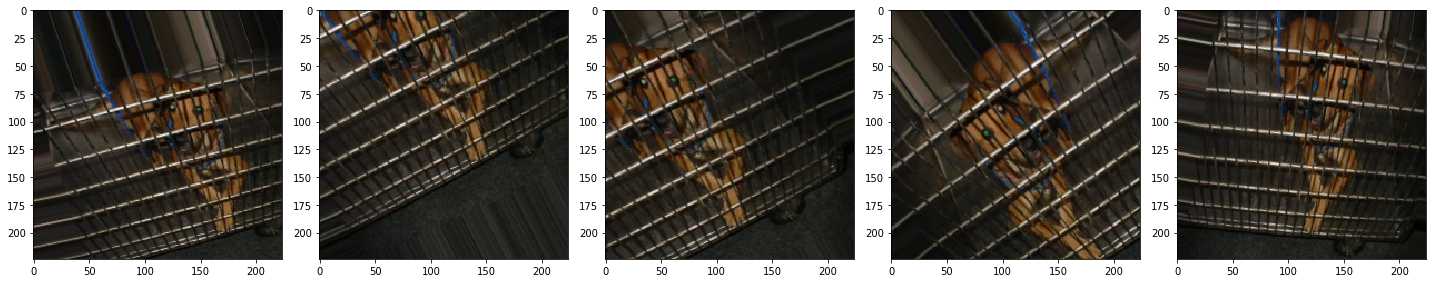

In [5]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

## Use Mobile Net

In [7]:
BATCH_SIZE = 5
IMG_SHAPE = 224 # match image dimension to mobile net input keep smae

In [8]:
# getting MobileNet
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net = hub.KerasLayer(URL, input_shape=(IMG_SHAPE, IMG_SHAPE, 3))

In [9]:
mobile_net.trainable = False

In [13]:
model = tf.keras.models.Sequential([
    mobile_net,
    ### ann layer
    tf.keras.layers.Dense(1, activation='sigmoid') #[0, 1] or [1, 0]
    ])

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit_generator(
    training_set,
    epochs=5,
    validation_data=test_set
    )

Epoch 1/5
7/7 [==============================] - 25s 3s/step - loss: 0.8895 - accuracy: 0.3527 - val_loss: 0.6262 - val_accuracy: 0.5800
Epoch 2/5
7/7 [==============================] - 18s 3s/step - loss: 0.5765 - accuracy: 0.6778 - val_loss: 0.4311 - val_accuracy: 0.8600
Epoch 3/5
7/7 [==============================] - 19s 3s/step - loss: 0.3435 - accuracy: 0.9117 - val_loss: 0.3294 - val_accuracy: 0.9300
Epoch 4/5
7/7 [==============================] - 23s 4s/step - loss: 0.2436 - accuracy: 0.9704 - val_loss: 0.2682 - val_accuracy: 0.9400
Epoch 5/5
7/7 [==============================] - 20s 3s/step - loss: 0.1897 - accuracy: 0.9662 - val_loss: 0.2352 - val_accuracy: 0.9500


### Load And Save Model

In [16]:
#save model
from tensorflow.keras.models import load_model
model.save('catvsdog.h5')

In [35]:
#load model
model = load_model(('catvsdog.h5'),custom_objects={'KerasLayer':hub.KerasLayer})

In [28]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def model_predict(image_path,model):
    print("Predicted")
    image = load_img(image_path,target_size=(224,224))
    image = img_to_array(image)
    image = image/255
    image = np.expand_dims(image,axis=0)
    
    result = model.predict(image)
    print(result)
    
    if result[0]<=0.5:
        print("The image classified is cat")
    else:
        print("The image classified is dog")

In [33]:
path='5544.jpg'
model_predict(path,model)

Predicted
[[0.03329277]]
The image classified is cat
